In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d ipythonx/global-wheat-challenge

Dataset URL: https://www.kaggle.com/datasets/ipythonx/global-wheat-challenge
License(s): unknown
100% 9.58G/9.58G [06:06<00:00, 20.5MB/s]
100% 9.58G/9.58G [06:06<00:00, 28.0MB/s]


In [3]:
!unzip global-wheat-challenge.zip

Streaming output truncated to the last 5000 lines.
  inflating: test/test/87026e30feeccfff4431c7cc078967099a1969b5a1b3178b7a7d65386b554358.png  
  inflating: test/test/872e33471444b3cbae7e451888e308fdc40aee341dd1c2121c7acad3bf26946f.png  
  inflating: test/test/87481a52c1e806a80c73f72795cc9498d0f27d6296c9b9bb240812732d484780.png  
  inflating: test/test/876249cbdfd206ed7d799f1f128c245a5b53f290638530b4f24e8e5a46207ed1.png  
  inflating: test/test/8769cffadfe0df97f7769b862b754d9575cd03e2ed1df1db27a2befae2bc9cac.png  
  inflating: test/test/87701b3e66837cb8e900d96a1799385f55d420d113d15417fe61df84d821fc16.png  
  inflating: test/test/87d5f64120af415f9fa6eddf4ff9d3ca776522ee5a8e0bb894a86fa64606bcc1.png  
  inflating: test/test/87fe907e634ccaa8f9160663df6533916c7ff990600d32941fe0c9b04aa61746.png  
  inflating: test/test/8831114cb03fd69f5f6f875a236269911cc8561fffd206cc13c4fc5697a492f1.png  
  inflating: test/test/884fbbcaf3943ed0ab42045884a871bde60f658fdd3a90e2a98d4536194631fe.png  
  inflati

In [5]:
!pip install torch==2.0 torchvision

  Using cached torch-2.0.0-cp310-cp310-manylinux1_x86_64.whl.metadata (24 kB)
  Using cached nvidia_cuda_nvrtc_cu11-11.7.99-2-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu11-11.7.99-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cuda_cupti_cu11-11.7.101-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu11-8.5.0.96-2-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu11-11.10.3.66-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cufft_cu11-10.9.0.58-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu11-10.2.10.91-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusolver_cu11-11.4.0.1-2-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu11-11.7.4.91-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu11-2.14.3-py3-none-manylinux1_x86_64.wh

# important library:

In [6]:
# Standard library imports
import os  # For handling file paths
import random  # For generating random numbers
from collections import Counter  # For counting hashable objects

# Third-party imports
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
from PIL import Image, ImageDraw  # For image handling and drawing
import matplotlib.pyplot as plt  # For plotting
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets

# PyTorch imports
import torch  # For tensor operations and neural networks
import torchvision  # For computer vision tasks

# Torchvision imports
from torchvision import transforms as T  # For data transformations
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor  # For Faster R-CNN model


# load train data:

In [63]:
train = pd.read_csv("/content/train/train.csv")
train.head()

image_name  \
0  7b73239dfd89b06c03e1be81cc5074ec47ae048305ec63...   
1  0e37ccf64ccbd456f07dcfe110133018f324e5bdf63b08...   
2  89e0aa4148f0a9ff01e9e55c5a2bcbe294150444dbe43c...   
3  fed8dde94c7a51de782b71f45c9115cdf7208cf7f33eee...   
4  8a593fc7894c37145d302bce36822bf21725088cf17b23...   

                                         BoxesString  domain  
0  949 967 999 994;368 649 443 685;118 280 185 33...       0  
1  691 60 730 119;838 901 897 969;477 444 526 489...       0  
2  953 178 1023 244;265 164 326 228;657 790 689 8...       0  
3  801 402 882 459;214 924 271 1023;299 726 360 7...       0  
4  187 887 294 1003;631 343 679 386;337 719 402 7...       0

# 💻 Labels

- All boxes are contained in a csv with three columns image_name, BoxesString and domain

- image_name is the name of the image, without the suffix. All
 images have a .png extension

- BoxesString is a string containing all predicted boxes with the format [x_min,y_min, x_max,y_max]. To concatenate a list of boxes into a PredString, please concatenate all list of coordinates with one space (" ") and all boxes with one semi-column ";". If there is no box, BoxesString is equal to "no_box".
domain give the domain for each image


In [64]:
print(train.columns)


Index(['image_name', 'BoxesString', 'domain'], dtype='object')


In [67]:
train.shape

(3657, 3)

In [68]:
train["BoxesString"][0]

'949 967 999 994;368 649 443 685;118 280 185 333;899 564 947 609;604 243 682 297;178 613 220 647;18 598 71 655;96 929 119 957;503 588 558 710;800 221 853 280;344 792 398 844;8 457 86 566;856 508 908 555;275 961 341 1022;707 874 757 940;495 401 554 460;947 85 1023 131;328 196 403 257;811 63 876 134;999 228 1022 317;400 975 478 1022;731 838 779 880;68 557 130 648;252 52 301 113;913 517 947 545;92 757 142 863;133 809 177 892;962 929 1003 1002;451 0 507 60;660 558 698 594;818 696 877 740;740 631 797 697;173 90 212 133;915 414 998 484;493 226 533 269;603 361 629 398;676 94 735 131;200 761 244 817;272 683 356 767;323 115 355 157;161 924 278 1018;587 303 645 358;48 970 120 1022;657 696 723 742'

In [69]:
# Function to process the BoxString
def process_boxstring(box_string):
    if box_string == 'no_box':
        return []  # Return an empty list if no bounding box is present

    boxes = box_string.split(';')

    # Initialize a list to store coordinates
    rows = []
    for box in boxes:
        coords = list(map(float, box.split()))
        rows.append(coords)

    return rows

# Function to expand the DataFrame with bounding box coordinates
def expand_bounding_boxes(df, box_column, id_column, additional_columns):
    # Create an empty list to collect the results
    result_list = []

    # Process each row in the DataFrame
    for index, row in df.iterrows():
        boxstring_rows = process_boxstring(row[box_column]) # Handle 'no_box' entries
        for box in boxstring_rows:
            result_list.append([row[id_column]] + box + [row[col] for col in additional_columns])

    # Convert the result list to a DataFrame
    columns = [id_column] + ['x_min', 'y_min', 'x_max', 'y_max'] + additional_columns
    result_df = pd.DataFrame(result_list, columns=columns)

    return result_df

In [70]:
box_column = 'BoxesString'  # Column with bounding boxes
id_column = 'image_name'  # Unique identifier for each image
additional_columns = ['domain']  # Other columns to include

In [71]:
# Expand bounding boxes
df = expand_bounding_boxes(train, box_column, id_column, additional_columns)

# Display the result
df.head()

image_name  x_min  y_min  x_max  \
0  7b73239dfd89b06c03e1be81cc5074ec47ae048305ec63...  949.0  967.0  999.0   
1  7b73239dfd89b06c03e1be81cc5074ec47ae048305ec63...  368.0  649.0  443.0   
2  7b73239dfd89b06c03e1be81cc5074ec47ae048305ec63...  118.0  280.0  185.0   
3  7b73239dfd89b06c03e1be81cc5074ec47ae048305ec63...  899.0  564.0  947.0   
4  7b73239dfd89b06c03e1be81cc5074ec47ae048305ec63...  604.0  243.0  682.0   

   y_max  domain  
0  994.0       0  
1  685.0       0  
2  333.0       0  
3  609.0       0  
4  297.0       0

In [72]:
df.shape

(163690, 6)

- make the values of the columns numeric values:

In [73]:
df

image_name  x_min  y_min  \
0       7b73239dfd89b06c03e1be81cc5074ec47ae048305ec63...  949.0  967.0   
1       7b73239dfd89b06c03e1be81cc5074ec47ae048305ec63...  368.0  649.0   
2       7b73239dfd89b06c03e1be81cc5074ec47ae048305ec63...  118.0  280.0   
3       7b73239dfd89b06c03e1be81cc5074ec47ae048305ec63...  899.0  564.0   
4       7b73239dfd89b06c03e1be81cc5074ec47ae048305ec63...  604.0  243.0   
...                                                   ...    ...    ...   
163685  618d3e5f3a932a9b6c877976ce9e512a6229b63b38bab8...  104.0   89.0   
163686  618d3e5f3a932a9b6c877976ce9e512a6229b63b38bab8...  624.0  250.0   
163687  618d3e5f3a932a9b6c877976ce9e512a6229b63b38bab8...  756.0  749.0   
163688  618d3e5f3a932a9b6c877976ce9e512a6229b63b38bab8...  279.0    0.0   
163689  618d3e5f3a932a9b6c877976ce9e512a6229b63b38bab8...  306.0  457.0   

        x_max  y_max  domain  
0       999.0  994.0       0  
1       443.0  685.0       0  
2       185.0  333.0       0  
3       947.0  609.0       0  
4       682.0  297.0       0  
...       ...    ...     ...  
163685  183.0  157.0      17  
163686  732.0  331.0      17  
163687  835.0  849.0      17  
163688  316.0   64.0      17  
163689  370.0  521.0      17  

[163690 rows x 6 columns]

In [74]:
df['x_min']=pd.to_numeric(df['x_min'])
df['y_min']=pd.to_numeric(df['y_min'])
df['x_max']=pd.to_numeric(df['x_max'])
df['y_max']=pd.to_numeric(df['y_max'])


In [75]:
df

image_name  x_min  y_min  \
0       7b73239dfd89b06c03e1be81cc5074ec47ae048305ec63...  949.0  967.0   
1       7b73239dfd89b06c03e1be81cc5074ec47ae048305ec63...  368.0  649.0   
2       7b73239dfd89b06c03e1be81cc5074ec47ae048305ec63...  118.0  280.0   
3       7b73239dfd89b06c03e1be81cc5074ec47ae048305ec63...  899.0  564.0   
4       7b73239dfd89b06c03e1be81cc5074ec47ae048305ec63...  604.0  243.0   
...                                                   ...    ...    ...   
163685  618d3e5f3a932a9b6c877976ce9e512a6229b63b38bab8...  104.0   89.0   
163686  618d3e5f3a932a9b6c877976ce9e512a6229b63b38bab8...  624.0  250.0   
163687  618d3e5f3a932a9b6c877976ce9e512a6229b63b38bab8...  756.0  749.0   
163688  618d3e5f3a932a9b6c877976ce9e512a6229b63b38bab8...  279.0    0.0   
163689  618d3e5f3a932a9b6c877976ce9e512a6229b63b38bab8...  306.0  457.0   

        x_max  y_max  domain  
0       999.0  994.0       0  
1       443.0  685.0       0  
2       185.0  333.0       0  
3       947.0  609.0       0  
4       682.0  297.0       0  
...       ...    ...     ...  
163685  183.0  157.0      17  
163686  732.0  331.0      17  
163687  835.0  849.0      17  
163688  316.0   64.0      17  
163689  370.0  521.0      17  

[163690 rows x 6 columns]

- Drop unneeded column:

In [76]:
df.drop(['domain'],axis=1,inplace=True)

In [77]:
df.head()

image_name  x_min  y_min  x_max  \
0  7b73239dfd89b06c03e1be81cc5074ec47ae048305ec63...  949.0  967.0  999.0   
1  7b73239dfd89b06c03e1be81cc5074ec47ae048305ec63...  368.0  649.0  443.0   
2  7b73239dfd89b06c03e1be81cc5074ec47ae048305ec63...  118.0  280.0  185.0   
3  7b73239dfd89b06c03e1be81cc5074ec47ae048305ec63...  899.0  564.0  947.0   
4  7b73239dfd89b06c03e1be81cc5074ec47ae048305ec63...  604.0  243.0  682.0   

   y_max  
0  994.0  
1  685.0  
2  333.0  
3  609.0  
4  297.0

In [78]:
df['image_name'][0]

'7b73239dfd89b06c03e1be81cc5074ec47ae048305ec6377b692a7df579723d1'

- Take the unique ids of the images:

In [79]:
unique_imgs=df.image_name.unique()
unique_imgs

array(['7b73239dfd89b06c03e1be81cc5074ec47ae048305ec6377b692a7df579723d1',
       '0e37ccf64ccbd456f07dcfe110133018f324e5bdf63b086b35c262079f142426',
       '89e0aa4148f0a9ff01e9e55c5a2bcbe294150444dbe43c303e399c02ed6d9142',
       ...,
       '99ecf64fab884c431969a12eb28ad29041aa190498d3aea87997016d57478ca0',
       'a543d8ab29e27fbd7fd96fa5f48ed2e84592c1372583bccd053532bdf5f88a81',
       '618d3e5f3a932a9b6c877976ce9e512a6229b63b38bab8289af93db9ee2d7328'],
      dtype=object)

- Make custom class for preparing the data:

In [ ]:
/kaggle/input/global-wheat-detection/train/

In [128]:
# Define a custom dataset class inheriting from torch.utils.data.Dataset
class custDat(torch.utils.data.Dataset):
    def __init__(self, df, unique_imgs, indices):
        """
        Initialize the dataset with a DataFrame, a list of unique image names, and indices.

        Args:
            df (pd.DataFrame): DataFrame containing image IDs and bounding box information.
            unique_imgs (list): List of unique image names.
            indices (list): List of indices to be used for accessing the dataset.
        """
        self.df = df  # DataFrame containing image and bounding box data
        self.unique_imgs = unique_imgs  # List of unique image names
        self.indices = indices  # Indices for accessing the images in the dataset

    def __len__(self):
        """
        Return the length of the dataset.

        Returns:
            int: Number of samples in the dataset.
        """
        return len(self.indices)  # Length of the dataset based on the indices

    def __getitem__(self, idx):
        """
        Get an item from the dataset at the specified index.

        Args:
            idx (int): Index of the item to be fetched.

        Returns:
            tuple: Tuple containing the image tensor and the target dictionary.
        """
        # Get the image name using the index
        image_name = self.unique_imgs[self.indices[idx]]

        # Get the bounding boxes for the image
        boxes = self.df[self.df['image_name'] == image_name].values[:, 1:].astype("float")  # Replace '<actual_column_name>'

        # Open the image and convert it to RGB format
        img = Image.open("/content/train/train/" + image_name + ".png").convert('RGB')

        # Create labels tensor with value 1 for each bounding box
        labels = torch.ones(boxes.shape[0], dtype=torch.int64)

        # Create the target dictionary containing boxes and labels
        target = {}
        target["boxes"] = torch.tensor(boxes)  # Bounding boxes as a tensor
        target["label"] = labels  # Labels as a tensor

        # Return the image converted to a tensor and the target dictionary
        return T.ToTensor()(img), target


# spit the data int train and validation:

In [129]:
train_inds , val_inds =train_test_split(range(unique_imgs.shape[0]),test_size=0.1)

In [130]:
def custom_collate(data):
    return data

Need for custom_collate in Object Detection
Handling Variable Number of Annotations:

In object detection, each image can have a different number of objects, and consequently, a different number of annotations (bounding boxes). The default collate function in PyTorch (default_collate) expects each sample in the batch to have the same shape, which is not the case here.
Maintaining Data Structure:

The custom_collate function helps maintain the structure of the data when it is batched together. Specifically, it returns the data as a list of tuples, where each tuple contains an image tensor and its corresponding target dictionary. This structure is essential for the Faster R-CNN model, which expects a list of such tuples as input.
Avoiding Collate Errors:

Without a custom collate function, the DataLoader might try to convert the list of dictionaries (targets) into a single tensor, which would fail due to the variable number of bounding boxes per image.

Input: data is a list of tuples. Each tuple contains:

An image tensor (e.g., T.ToTensor()(img)).
A target dictionary (e.g., target with keys "boxes" and "labels").
Output: The same list of tuples is returned without any modification.

# Call the data loader to prepare it to the model:

In [131]:
train_dl = torch.utils.data.DataLoader(custDat(df,unique_imgs,train_inds),
                                       batch_size=16,
                                       shuffle=True,
                                       collate_fn=custom_collate,
                                       pin_memory=True if torch.cuda.is_available() else False)
val_dl = torch.utils.data.DataLoader(custDat(df,unique_imgs,val_inds),
                                     batch_size=8,
                                     shuffle=True,
                                     collate_fn=custom_collate,
                                     pin_memory=True if torch.cuda.is_available() else False)

# Modeling:

In [107]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [108]:
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [132]:
num_classes=2

In [133]:
in_features=model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor =  FastRCNNPredictor(in_features,num_classes)
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [90]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [91]:
device

device(type='cuda')

In [134]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.001,momentum=0.9,weight_decay=0.005)
num_epochs=5

_ train the model with 5 epochs and prin the loss:

In [135]:
# Move the model to the specified device (CPU or GPU)
model.to(device)

# Loop over the number of epochs
for epoch in range(num_epochs):
    epoch_loss = 0  # Initialize the loss for the current epoch

    # Loop over the data in the training DataLoader
    for data in train_dl:
        imgs = []  # List to store the images
        targets = []  # List to store the target dictionaries

        # Loop over each data sample in the batch
        for d in data:
            # Append the image tensor to the imgs list and move it to the device
            imgs.append(d[0].to(device))

            # Create a target dictionary for the current sample
            targ = {}
            # Move the bounding boxes tensor to the device
            targ['boxes'] = d[1]['boxes'].to(device)
            # Move the labels tensor to the device
            targ['labels'] = d[1]['label'].to(device)

            # Append the target dictionary to the targets list
            targets.append(targ)

        # Perform a forward pass through the model and get the loss dictionary
        loss_dict = model(imgs, targets)

        # Sum all the losses in the loss dictionary to get the total loss
        loss = sum(v for v in loss_dict.values())

        # Add the loss for the current batch to the epoch loss, converting it to a numpy value
        epoch_loss += loss.cpu().detach().numpy()

        # Zero the gradients of the optimizer
        optimizer.zero_grad()

        # Backpropagate the loss
        loss.backward()

        # Update the model parameters
        optimizer.step()

    # Print the total loss for the current epoch
    print(epoch_loss)

219.46385782774757
176.69593768677083
169.845855093467
165.51862626155383
162.52250689752088


In [136]:
# prompt: saving model and trained params

# Save the entire model
torch.save(model, 'entire_model.pth')

# Save only the model's state dictionary (recommended for most cases)
torch.save(model.state_dict(), 'model_weights.pth')


In [137]:
from google.colab import files

files.download('entire_model.pth')

files.download('model_weights.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ERROR:root:Unexpected exception finding object shape
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/google/colab/_debugpy_repr.py", line 54, in get_shape
    shape = getattr(obj, 'shape', None)
  File "/usr/local/lib/python3.10/dist-packages/werkzeug/local.py", line 318, in __get__
    obj = instance._get_current_object()
  File "/usr/local/lib/python3.10/dist-packages/werkzeug/local.py", line 519, in _get_current_object
    raise RuntimeError(unbound_message) from None
RuntimeError: Working outside of request context.

This typically means that you attempted to use functionality that needed
an active HTTP request. Consult the documentation on testing for
information about how to avoid this problem.


- Evaluate the model

In [138]:
model.eval()
data = iter(val_dl).__next__()

In [139]:
img= data[0][0]
boxes=data[0][1]['boxes']
labels=data[0][1]['label']

In [140]:
output = model([img.to(device)])

- output os the evaluation:

In [141]:
output

[{'boxes': tensor([[5.5192e+02, 0.0000e+00, 6.6526e+02, 8.9157e+01],
          [1.1562e+02, 0.0000e+00, 2.3593e+02, 1.0908e+02],
          [5.4269e+02, 4.6989e+02, 6.5019e+02, 5.6668e+02],
          [6.4181e+02, 5.5875e+02, 7.8504e+02, 6.4061e+02],
          [6.4436e+02, 3.0089e+01, 7.4709e+02, 7.6027e+01],
          [8.1121e+02, 6.3940e-01, 9.2005e+02, 4.9790e+01],
          [8.8329e+02, 2.1516e+02, 9.8961e+02, 2.5917e+02],
          [5.1922e+02, 1.7696e+02, 5.8284e+02, 2.4521e+02],
          [8.3927e+02, 7.8986e+02, 9.4945e+02, 8.3021e+02],
          [9.7479e+02, 4.8683e+02, 1.0240e+03, 5.4282e+02],
          [7.2539e+01, 5.8653e+02, 1.7293e+02, 6.4152e+02],
          [1.3235e+01, 2.5613e+02, 1.6962e+02, 3.0239e+02],
          [3.1429e+01, 1.5610e+02, 1.8562e+02, 2.0580e+02],
          [7.3102e+02, 2.6110e+00, 8.0083e+02, 5.5349e+01],
          [4.3136e+02, 8.2869e+02, 5.3327e+02, 8.6700e+02],
          [9.3930e+01, 6.7760e+02, 2.2691e+02, 7.2288e+02],
          [9.5053e+02, 6.6691e+

In [142]:
out_bbox=output[0]['boxes']
out_scores=output[0]['scores']

In [143]:
keep = torchvision.ops.nms(out_bbox,out_scores,0.45)

In [144]:
out_bbox.shape , keep.shape

(torch.Size([65, 4]), torch.Size([59]))

- prediction detection:

In [145]:
im = (img.permute(1,2,0).cpu().detach().numpy()*255).astype('uint8')
im

array([[[118, 137, 113],
        [ 99, 121, 104],
        [ 92, 117, 102],
        ...,
        [  7,  17,   8],
        [  7,  17,   9],
        [  8,  18,   9]],

       [[131, 150, 119],
        [101, 128, 107],
        [ 87, 118, 102],
        ...,
        [  8,  17,   8],
        [  7,  17,   8],
        [  8,  18,   9]],

       [[141, 162, 129],
        [107, 138, 114],
        [ 85, 123, 106],
        ...,
        [ 11,  18,   9],
        [  9,  19,   9],
        [  9,  19,   9]],

       ...,

       [[ 92, 121,  64],
        [ 97, 124,  70],
        [106, 133,  84],
        ...,
        [ 57,  85,  58],
        [ 43,  60,  41],
        [ 22,  30,  16]],

       [[ 87, 116,  59],
        [ 94, 122,  69],
        [102, 128,  83],
        ...,
        [ 66, 101,  66],
        [ 68,  99,  69],
        [ 52,  78,  52]],

       [[ 82, 109,  58],
        [ 89, 114,  60],
        [104, 127,  76],
        ...,
        [ 63,  99,  60],
        [ 65, 102,  63],
        [ 62,  96,  61]]

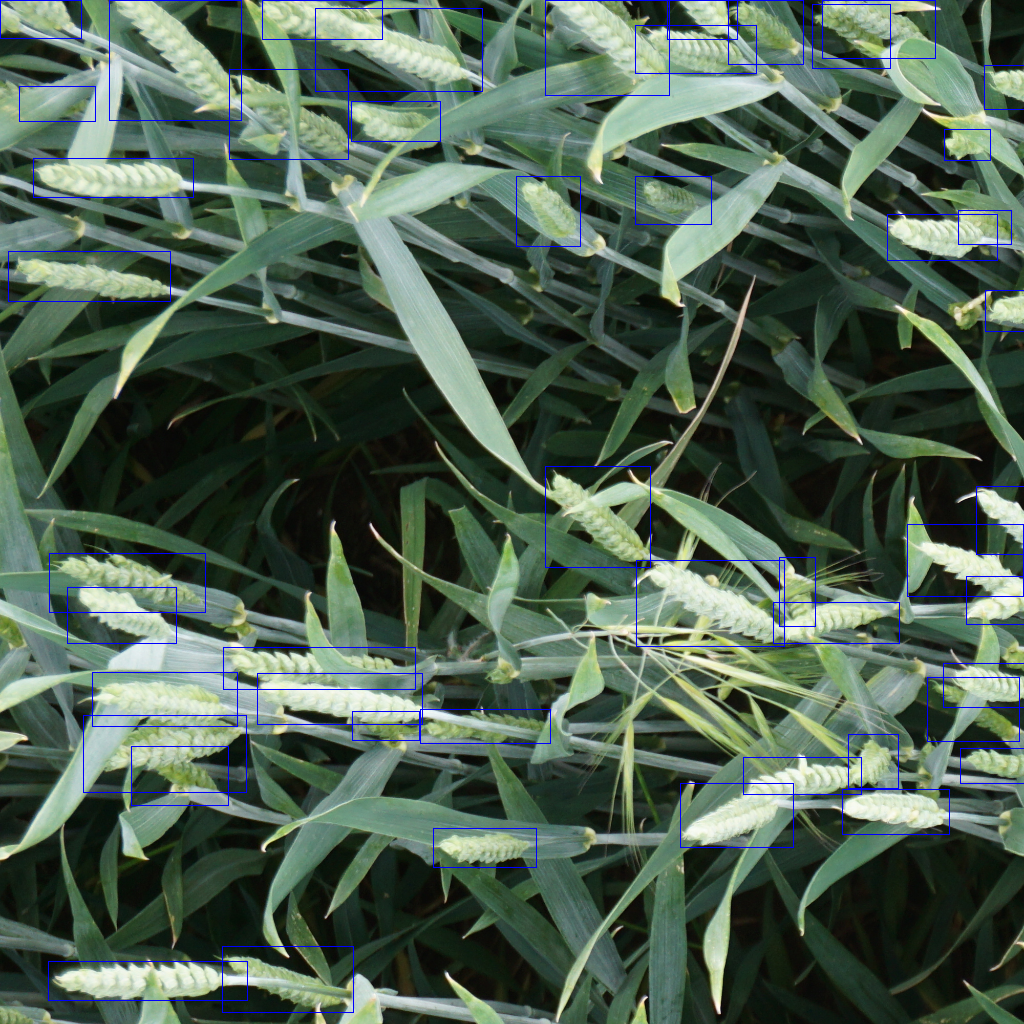

In [147]:
vsample = Image.fromarray(im)
draw = ImageDraw.Draw(vsample)
for box in boxes :
    draw.rectangle(list(box),fill=None,outline='blue')
vsample

In [ ]:
# Save the model state
torch.save(model.state_dict(), 'modified_fasterrcnn_resnet50_fpn.pth')

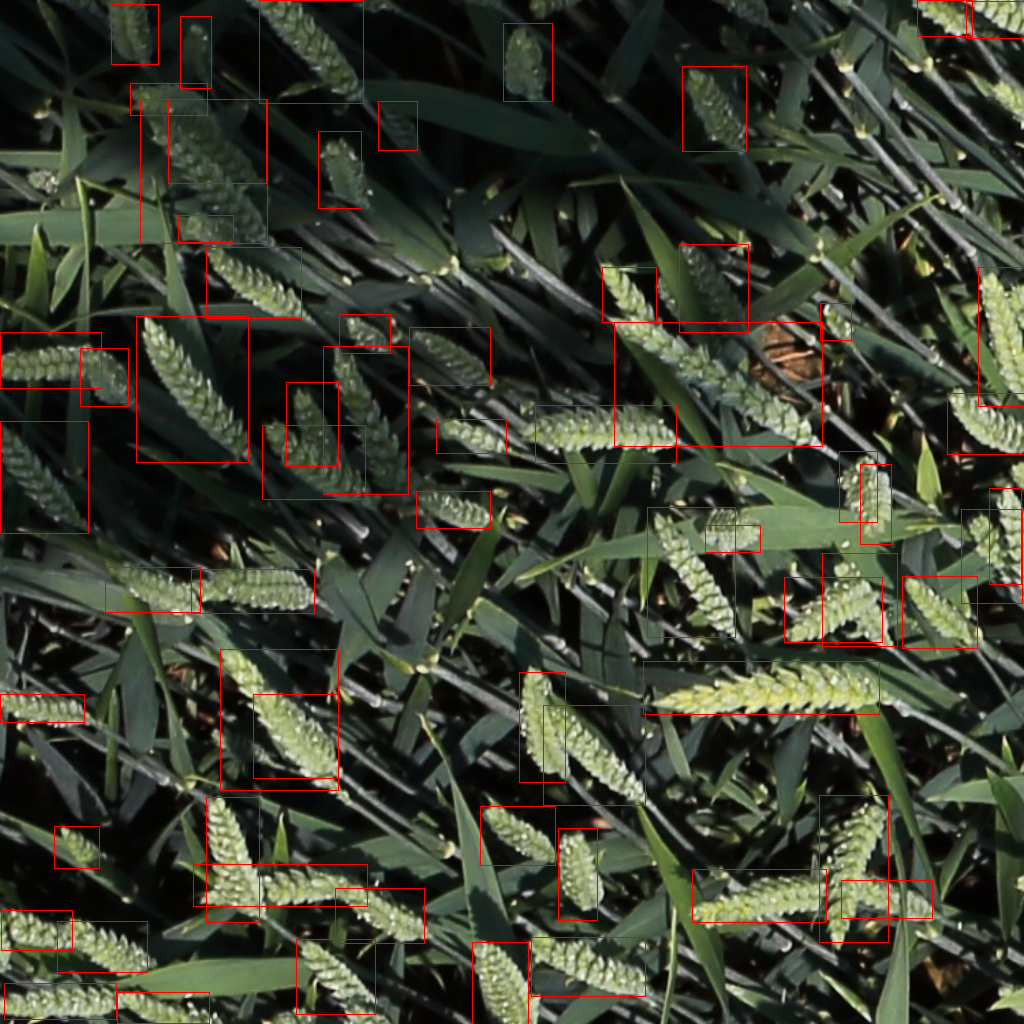

In [148]:
model.eval()
data = iter(val_dl).__next__()

img= data[0][0]
boxes=data[0][1]['boxes']
labels=data[0][1]['label']

output = model([img.to(device)])

out_bbox=output[0]['boxes']
out_scores=output[0]['scores']

keep = torchvision.ops.nms(out_bbox,out_scores,0.45)

out_bbox.shape , keep.shape
im = (img.permute(1,2,0).cpu().detach().numpy()*255).astype('uint8')

vsample = Image.fromarray(im)
draw = ImageDraw.Draw(vsample)
for box in boxes :
    draw.rectangle(list(box),fill=None,outline='red')
vsample

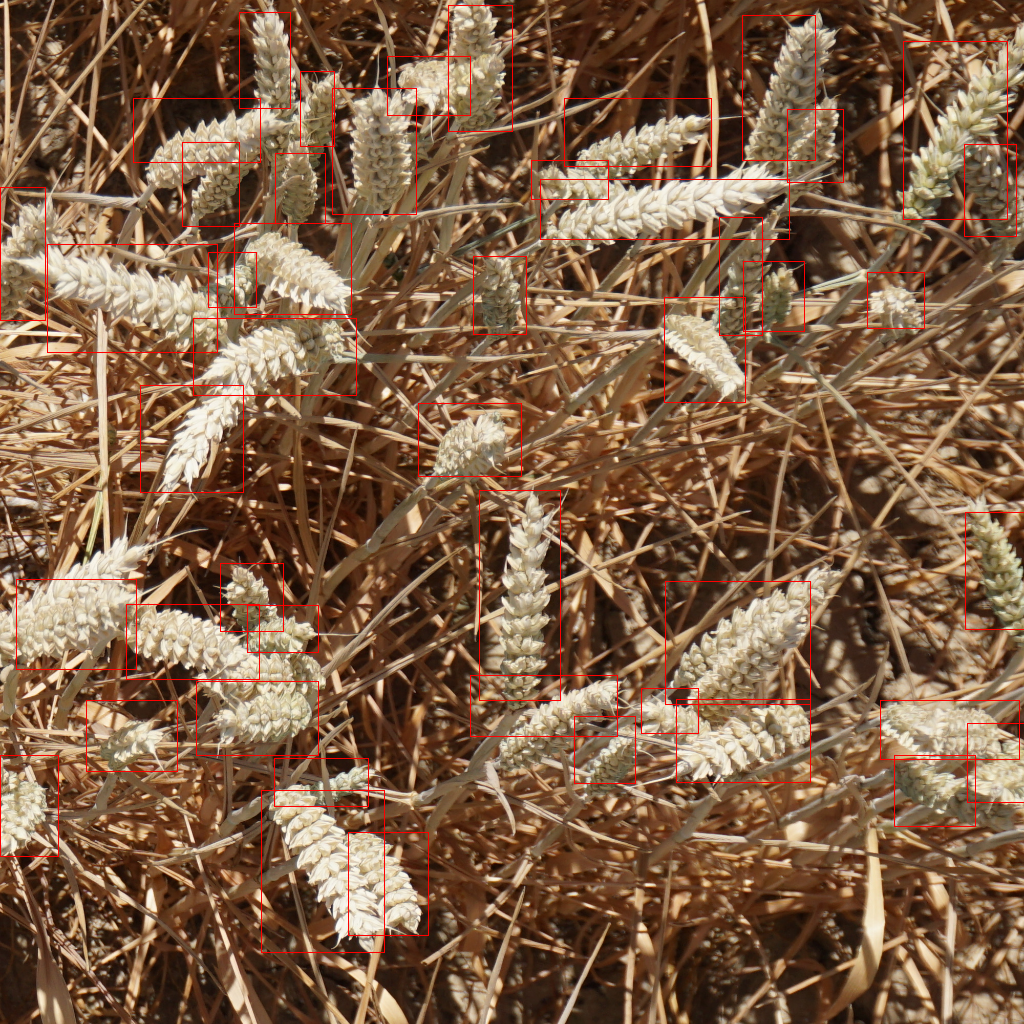

In [149]:
model.eval()
data = iter(val_dl).__next__()

img= data[0][0]
boxes=data[0][1]['boxes']
labels=data[0][1]['label']

output = model([img.to(device)])

out_bbox=output[0]['boxes']
out_scores=output[0]['scores']

keep = torchvision.ops.nms(out_bbox,out_scores,0.45)

out_bbox.shape , keep.shape
im = (img.permute(1,2,0).cpu().detach().numpy()*255).astype('uint8')

vsample = Image.fromarray(im)
draw = ImageDraw.Draw(vsample)
for box in boxes :
    draw.rectangle(list(box),fill=None,outline='red')
vsample

# Load the saved model

In [150]:
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# Function to create the model and replace the classifier head
def create_model(num_classes):
    # Load a pre-trained model
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=False)

    # Get the number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features

    # Replace the pre-trained head with a new one (adjusting for the number of classes)
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    return model

# Specify the number of classes (1 class + background)
num_classes = 2

# Create a model instance
model2 = create_model(num_classes)

# Load the saved model state dictionary
model2.load_state_dict(torch.load('/content/model_weights.pth'))

# Move the model to the specified device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model2.to(device)

# Now the model is ready to be used for inference or further training

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 218MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=1e-05)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=1e-05)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=1e-05)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=1e-05)
          (relu

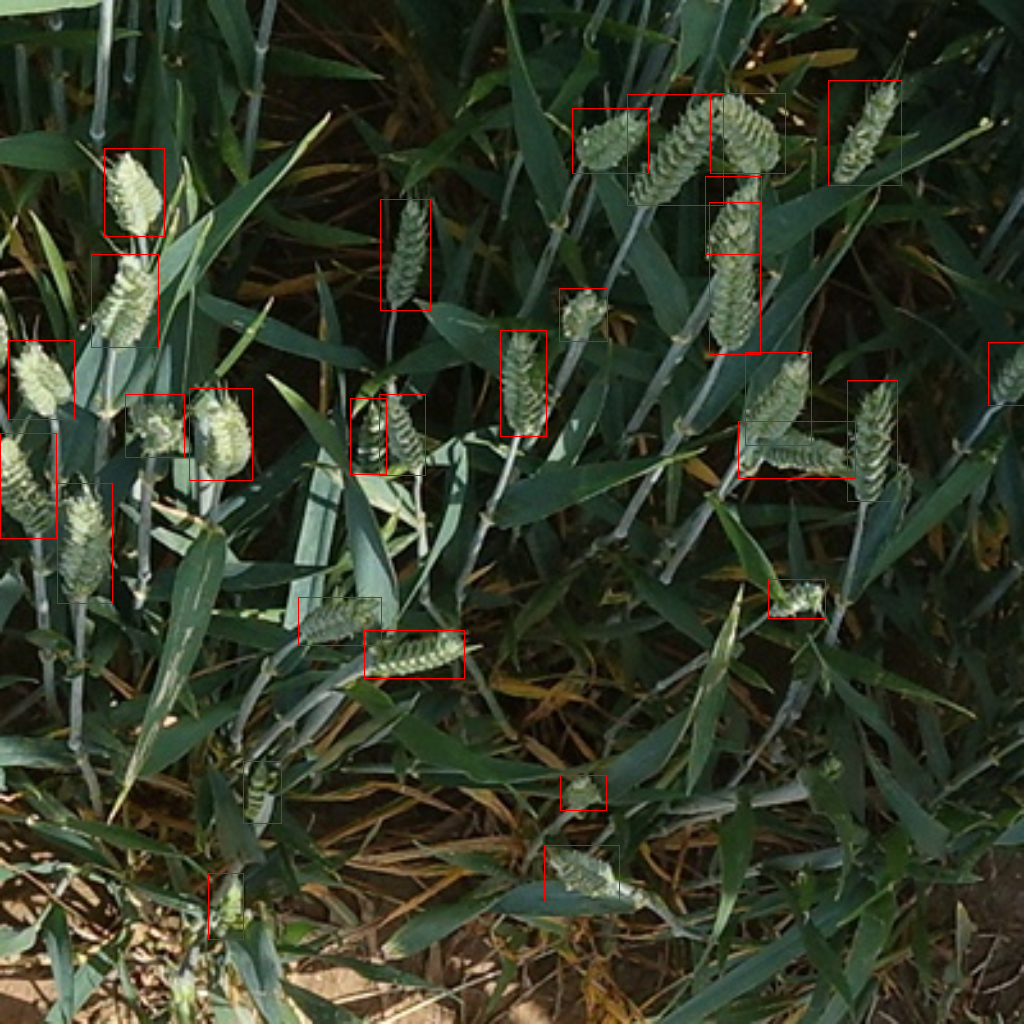

In [151]:
model2.eval()
data = iter(val_dl).__next__()

img= data[0][0]
boxes=data[0][1]['boxes']
labels=data[0][1]['label']

output = model([img.to(device)])

out_bbox=output[0]['boxes']
out_scores=output[0]['scores']

keep = torchvision.ops.nms(out_bbox,out_scores,0.45)

out_bbox.shape , keep.shape
im = (img.permute(1,2,0).cpu().detach().numpy()*255).astype('uint8')

vsample = Image.fromarray(im)
draw = ImageDraw.Draw(vsample)
for box in boxes :
    draw.rectangle(list(box),fill=None,outline='red')
vsample

In [ ]:
# # prompt: wright a flask app code with for prediction and image
# from flask import Flask, request, jsonify, render_template
# import torch
# from PIL import Image
# import torchvision
# import torchvision.transforms as T
# from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
# import io
# import numpy as np

# # Function to create the model and replace the classifier head
# def create_model(num_classes):
#     # Load a pre-trained model
#     model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=False)

#     # Get the number of input features for the classifier
#     in_features = model.roi_heads.box_predictor.cls_score.in_features

#     # Replace the pre-trained head with a new one (adjusting for the number of classes)
#     model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

#     return model

# # Specify the number of classes (1 class + background)
# num_classes = 2

# # Create a model instance
# model = create_model(num_classes)

# # Load the saved model state dictionary
# model.load_state_dict(torch.load('/content/model_weights.pth', map_location=torch.device('cpu')))

# # Move the model to the CPU
# device = torch.device('cpu')
# model.to(device)

# # Set the model to evaluation mode
# model.eval()

# # Define the transformation to apply to the input image
# transform = T.Compose([
#     T.ToTensor()
# ])

# app = Flask(__name__)

# @app.route('/', methods=['GET', 'POST'])
# def index():
#     if request.method == 'POST':
#         # Get the uploaded image file
#         file = request.files['image']

#         # Read the image file into a PIL Image object
#         image = Image.open(io.BytesIO(file.read()))

#         # Transform the image and move it to the device
#         image_tensor = transform(image).unsqueeze(0).to(device)

#         # Perform inference
#         with torch.no_grad():
#             output = model(image_tensor)

#         # Extract the predicted bounding boxes
#         boxes = output[0]['boxes'].cpu().numpy()

#         # Return the bounding boxes as a JSON response
#         return jsonify({'boxes': boxes.tolist()})

#     # Render the HTML template for the upload form
#     return render_template('index.html')

# if __name__ == '__main__':
#     app.run(debug=True, port=9090)


In [166]:

from flask import Flask, request, jsonify, render_template
import torch
from PIL import Image, ImageDraw
import torchvision
import torchvision.transforms as T
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import io
import numpy as np
import base64

# Function to create the model and replace the classifier head
def create_model(num_classes):
    # Load a pre-trained model
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

    # Get the number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features # Get in_features before replacing

    # Replace the pre-trained head with a new one (adjusting for the number of classes)
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    return model

# Specify the number of classes (1 class + background)
num_classes = 2

# Create a model instance
model = create_model(num_classes)

# Load the saved model state dictionary
model.load_state_dict(torch.load('model_weights.pth', map_location=torch.device('cpu')))

# Move the model to the CPU
device = torch.device('cpu')
model.to(device)

# Set the model to evaluation mode
model.eval()

# Define the transformation to apply to the input image
transform = T.Compose([
    T.ToTensor()
])

app = Flask(__name__)

@app.route('/', methods=['GET', 'POST'])
def index():
    if request.method == 'POST':
        # Get the uploaded image file
        file = request.files['image']

        # Read the image file into a PIL Image object
        image = Image.open(io.BytesIO(file.read())).convert("RGB")

        # Transform the image and move it to the device
        image_tensor = transform(image).unsqueeze(0).to(device)

        # Perform inference
        with torch.no_grad():
            output = model(image_tensor)

        # Extract the predicted bounding boxes
        boxes = output[0]['boxes'].cpu().numpy()

        # Draw bounding boxes on the image
        draw = ImageDraw.Draw(image)
        for box in boxes:
            x1, y1, x2, y2 = box
            draw.rectangle([x1, y1, x2, y2], outline="red", width=3)

        # Convert image to base64 to embed in HTML
        buffered = io.BytesIO()
        image.save(buffered, format="PNG")
        img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")

        return render_template('index.html', img_data=img_str)

    # Render the HTML template for the upload form
    return render_template('index.html', img_data=None)

if __name__ == '__main__':
    app.run(debug=True, port=9090)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:9090
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [167]:
%%writefile index.html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Object Detection</title>
</head>
<body>
    <h1>Upload an Image for Object Detection</h1>
    <form method="post" enctype="multipart/form-data">
        <input type="file" name="image" accept="image/*" required>
        <button type="submit">Upload</button>
    </form>

    {% if img_data %}
        <h2>Predicted Image</h2>
        <img src="data:image/png;base64,{{ img_data }}" alt="Predicted Image">
    {% endif %}
</body>
</html>


Writing index.html
